# Australian Open 2020: Winner Predictor
## Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
#### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib inline

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# our modules
from preprocessing import *
from models import *
from reports import *

In [2]:
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=DATA_TYPES,
                            parse_dates=['Date', 'WBD', 'LBD'])

In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,WElo,WSurfElo,WBD,WHand,WBHand,LElo,LSurfElo,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1783.4,1724.7,NaT,NaN,NaN,NaN,NaN,1984-03-24,R,1.0
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,1610.9,1611.0,1986-09-07,R,2.0,NaN,NaN,1974-05-05,L,2.0
2,2,Chennai,Chennai Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Kendrick R.,...,NaN,NaN,1979-11-15,R,2.0,NaN,NaN,1981-08-16,L,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,NaN,NaN,1987-02-10,R,2.0,NaN,NaN,1985-08-07,R,2.0
4,1,Brisbane,Brisbane International,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Roddick A.,...,NaN,NaN,1982-08-30,R,2.0,NaN,NaN,1985-08-08,R,2.0


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 52 columns):
ATP           23634 non-null int32
Location      23634 non-null object
Tournament    23634 non-null object
Date          23634 non-null datetime64[ns]
Series        23634 non-null object
Court         23634 non-null object
Surface       23634 non-null object
Round         23634 non-null object
Best of       23634 non-null int32
Winner        23634 non-null object
Loser         23634 non-null object
WRank         23624 non-null float64
LRank         23586 non-null float64
WPts          23626 non-null float64
LPts          23587 non-null float64
W1            23483 non-null float64
L1            23485 non-null float64
W2            23260 non-null float64
L2            23260 non-null float64
W3            11173 non-null float64
L3            11173 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23634.0,33.036896,18.040228,1.000,19.00,33.00,49.00,67.00
Best of,23634.0,3.386139,0.789431,3.000,3.00,3.00,3.00,5.00
WRank,23624.0,56.754614,70.940513,1.000,16.00,40.00,74.00,1890.00
LRank,23586.0,87.187908,109.198180,1.000,34.00,62.00,100.00,2159.00
WPts,23626.0,1988.829002,2477.960179,1.000,693.00,1060.00,2030.00,16950.00
LPts,23587.0,1127.641497,1294.122302,1.000,557.00,788.00,1195.00,16950.00
W1,23483.0,5.806583,1.225518,0.000,6.00,6.00,6.00,7.00
L1,23485.0,4.105770,1.834737,0.000,3.00,4.00,6.00,7.00
W2,23260.0,5.784007,1.246084,0.000,6.00,6.00,6.00,7.00
L2,23260.0,3.952193,1.857456,0.000,3.00,4.00,6.00,7.00


In [6]:
def compute_elo_rankings(data):
    """
    Given the list on matches in chronological order, for each match, computes 
    the elo ranking of the 2 players at the beginning of the match
    """
    print("Elo rankings computing...")
    players=list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo=pd.Series(np.ones(len(players))*1500,index=players)
    ranking_elo=[(1500,1500)]
    for i in range(1,len(data)):
        w=data.iloc[i-1,:].Winner
        l=data.iloc[i-1,:].Loser
        elow=elo[w]
        elol=elo[l]
        pwin=1 / (1 + 10 ** ((elol - elow) / 400))    
        K_win=32
        K_los=32
        new_elow=elow+K_win*(1-pwin)
        new_elol=elol-K_los*(1-pwin)
        elo[w]=new_elow
        elo[l]=new_elol
        ranking_elo.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
    ranking_elo=pd.DataFrame(ranking_elo,columns=["elo_winner","elo_loser"])    
    ranking_elo["proba_elo"]=1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))   
    return ranking_elo

In [7]:
from preprocessing import *
X, Y = preprocess_data(min_date=2014,
                       features_to_drop=[])

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13514 entries, 0 to 13514
Data columns (total 24 columns):
Series            13514 non-null int64
Court             13514 non-null int64
Round             13514 non-null int64
Best of           13514 non-null int32
P1Rank            13514 non-null int32
P2Rank            13514 non-null int32
WPts              13514 non-null float64
LPts              13514 non-null float64
MaxP1             13514 non-null float64
MaxP2             13514 non-null float64
AvgP1             13514 non-null float64
AvgP2             13514 non-null float64
WElo              13514 non-null float64
WSurfElo          13514 non-null float64
WHand             13514 non-null int64
WBHand            13514 non-null float64
LElo              13514 non-null float64
LSurfElo          13514 non-null float64
LHand             13514 non-null int64
LBHand            13514 non-null float64
Surface__Clay     13514 non-null uint8
Surface__Grass    13514 non-null uint8
Surface__

In [9]:
X.head()

,Series,Court,Round,Best of,P1Rank,P2Rank,WPts,LPts,MaxP1,MaxP2,...,WHand,WBHand,LElo,LSurfElo,LHand,LBHand,Surface__Clay,Surface__Grass,Surface__Hard,GreaterRank
0,0,0,1,3,31,9,1230.0,3300.0,1.66,2.54,...,0,2.0,1793.3,1730.5,0,1.0,0,0,1,0
11,0,0,1,3,17,68,1915.0,706.0,1.44,3.50,...,0,2.0,1641.9,1598.2,0,2.0,0,0,1,1
10,0,0,1,3,37,23,1130.0,1520.0,2.56,1.67,...,0,2.0,1837.8,1805.7,0,1.0,0,0,1,0
3,0,0,1,3,1,74,13030.0,663.0,1.06,17.50,...,1,2.0,1532.0,1508.0,0,2.0,0,0,1,1
7,0,0,1,3,162,22,321.0,1525.0,4.30,1.27,...,0,2.0,1789.2,1763.2,0,1.0,0,0,1,0


In [10]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,13514.0,1.477135,1.505004,0.00,0.00,1.00,2.00,4.00
Court,13514.0,0.178778,0.383180,0.00,0.00,0.00,0.00,1.00
Round,13514.0,1.681663,2.160929,0.00,0.00,1.00,2.00,7.00
Best of,13514.0,3.408761,0.806526,3.00,3.00,3.00,3.00,5.00
P1Rank,13514.0,63.044176,77.084345,1.00,20.00,46.00,82.00,1821.00
P2Rank,13514.0,63.044176,77.084345,1.00,20.00,46.00,82.00,1821.00
WPts,13514.0,1807.103152,2323.210849,1.00,663.00,995.00,1770.00,16950.00
LPts,13514.0,1807.103152,2323.210849,1.00,663.00,995.00,1770.00,16950.00
MaxP1,13514.0,6.280736,362.458932,1.01,1.46,2.00,3.16,42136.00
MaxP2,13514.0,6.280736,362.458932,1.01,1.46,2.00,3.16,42136.00


Models construction

In [11]:
print('Accuracy for the baseline model is:', baseline_model(X, Y))

Accuracy for the baseline model is: 0.34


Let's split the data into train set, validation set and test set

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25)

Max accuracy (validation, training): (0.708, 0.699)
Criterion: entropy
Splitter: random
Max depth: 13
Max leaves: 40
Execution took 0.20 min


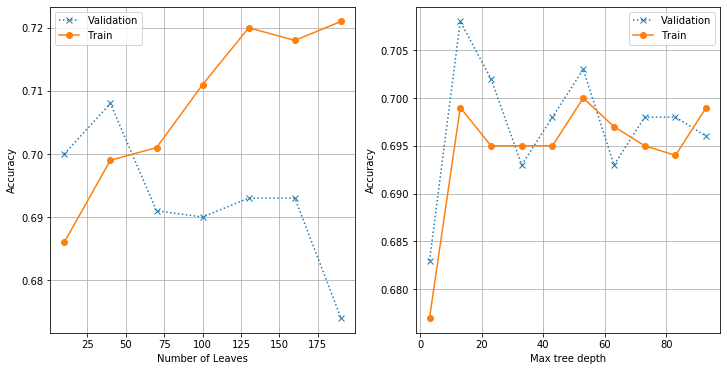

In [19]:
dt, dt_params = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.708, 0.874)
Boostrap: False
N. estimators: 120
Max samples: 0.25
Tree criterion: gini
Execution took 6.85 min


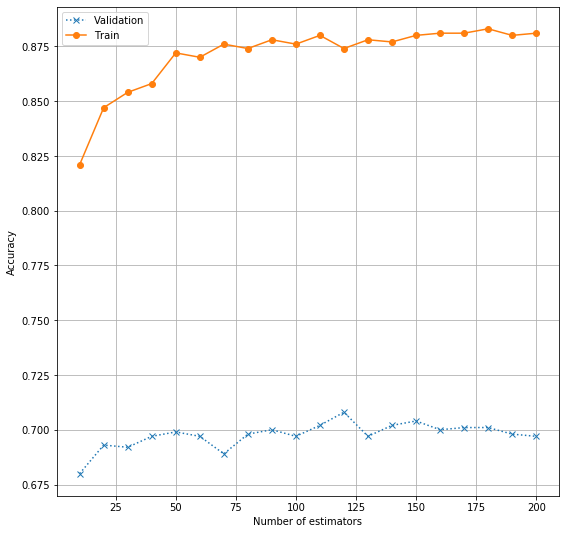

In [14]:
bagged_dt, bagged_params = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

In [15]:
#boosted_dt, boosted_params = build_adaboost(X_train, Y_train, X_valid, Y_valid)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
boosted_dt = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini'),
                                n_estimators=500,
                                learning_rate=1.5)
boosted_dt.fit(pd.concat([X_train, X_valid]), np.concatenate([Y_train, Y_valid]))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

Max accuracy on validation set: 0.704
N. estimators: 250
Criterion: entropy
Bootstrap: True
Features criterion (None means all features): sqrt
Execution took 4.33 min


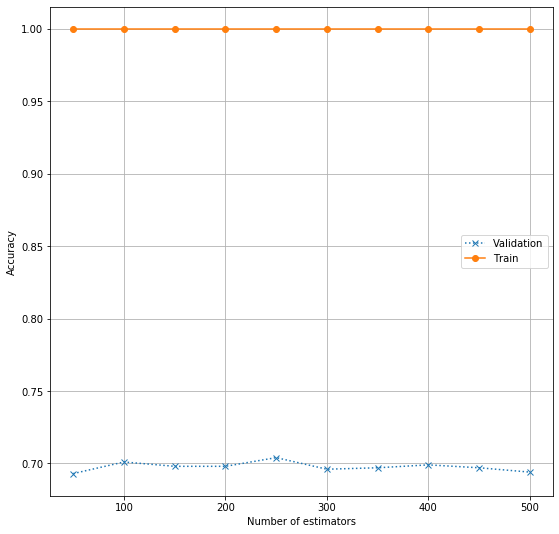

In [16]:
rf, rf_params = build_random_forest(X_train, Y_train, X_valid, Y_valid)

In [20]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt), 
          ('AdaBoost', boosted_dt), 
          ('Random Forest', rf)]

Approximate decision boundaries for the different models


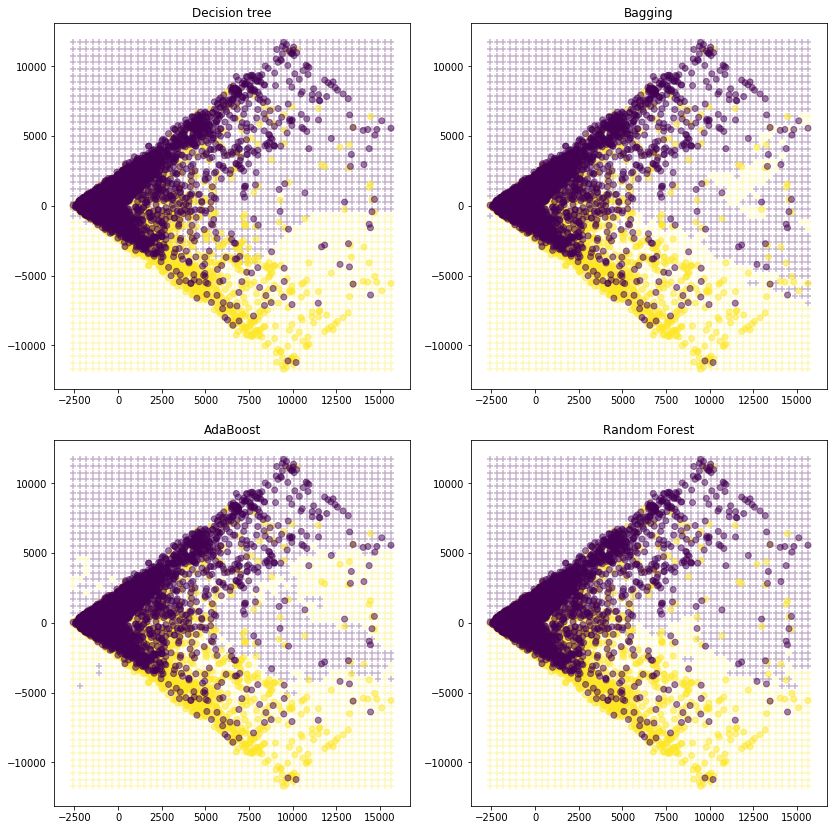

In [21]:
model_decision_boundary(models, X, Y)

 0  ->  Series
 1  ->  Court
 2  ->  Round
 3  ->  Best of
 4  ->  P1Rank
 5  ->  P2Rank
 6  ->  WPts
 7  ->  LPts
 8  ->  MaxP1
 9  ->  MaxP2
10  ->  AvgP1
11  ->  AvgP2
12  ->  WElo
13  ->  WSurfElo
14  ->  WHand
15  ->  WBHand
16  ->  LElo
17  ->  LSurfElo
18  ->  LHand
19  ->  LBHand
20  ->  Surface__Clay
21  ->  Surface__Grass
22  ->  Surface__Hard
23  ->  GreaterRank


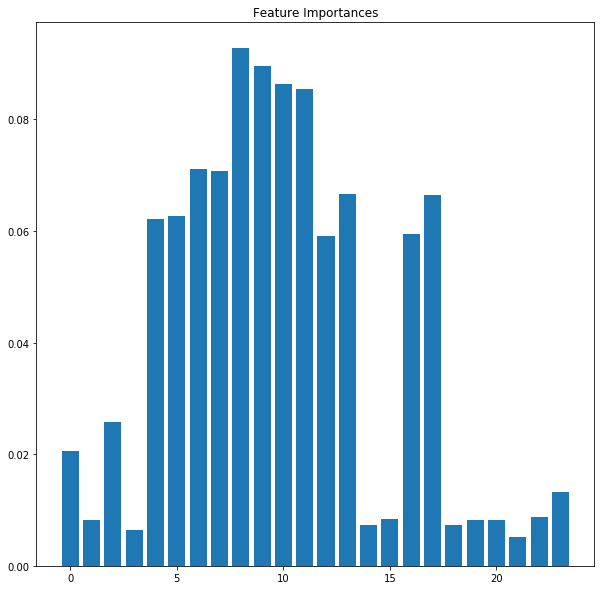

In [22]:
feature_importance(X, rf)

In [23]:
report(X_test, Y_test, models)

Algorithm: Decision tree
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      1326
           1       0.73      0.63      0.67      1377

    accuracy                           0.69      2703
   macro avg       0.69      0.69      0.69      2703
weighted avg       0.69      0.69      0.69      2703


Algorithm: Bagging
              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1326
           1       0.72      0.69      0.71      1377

    accuracy                           0.71      2703
   macro avg       0.71      0.71      0.71      2703
weighted avg       0.71      0.71      0.71      2703


Algorithm: AdaBoost
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1326
           1       0.69      0.66      0.68      1377

    accuracy                           0.67      2703
   macro avg       0.67      0.68      0.67      2703
weighted